In [5]:
import glob
import os

import GPRutils
import DESutils
import vK2KGPR
import plotGPR
import vonkarmanFT as vk

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.modeling import models, fitting

import warnings
warnings.filterwarnings("ignore")

exps = DESutils.findExpNums()
gband = DESutils.bandDict["g"]
rband = DESutils.bandDict["r"]
iband = DESutils.bandDict["i"]
zband = DESutils.bandDict["z"]

In [66]:
bands = {"g": "tab:green", "r": "tab:red", "i": "tab:purple", "z": "tab:orange"}
d = {band: [] for band in bands.keys()}

for expNum in exps:
    dC = GPRutils.dataContainer()
    dC.load(expNum)
    
    x = dC.TV[dC.TV["Mask0"]]["X"].value
    y = dC.TV[dC.TV["Mask0"]]["Y"].value
    dx = dC.TV[dC.TV["Mask0"]]["dX"].value
    dy = dC.TV[dC.TV["Mask0"]]["dY"].value
    err = dC.TV[dC.TV["Mask0"]]["DES variance"].value
    
    # Find the observed turbulence
    xi = GPRutils.getXi(np.vstack([x, y]).T, np.vstack([dx, dy]).T)
    turbulence = xi[0]/2

    # Get an array of indices to index the entire table.
    table_inds = np.arange(len(dC.TV))

    # Sort the table by increasing DES variance.
    sort = np.argsort(err)

    # Get the indices from table_inds that only include the stars kept
    # by Mask0, and then sort them.
    sort_inds = table_inds[dC.TV["Mask0"]][sort]

    # Get the sorted residual field
    resid_x = dx[sort]
    resid_y = dy[sort]
    desvar = err[sort]

    # Split arrays into groups of nStars. This is an arbitrary choice.
    # 256 seems to work well for a catalog of stars with about 1 star
    # per arcmin^2 though.
    nStars = 256

    # Split the residual field arrays and the indices array into
    # sub-arrays of size approximately equal to nStars. See
    # documentation for np.array_split for exactly how the split is
    # made. Note that each sub-array will not be length (nStars,)
    # exactly.
    sort_inds = np.array_split(sort_inds, len(sort_inds)//nStars)
    resid_x = np.array_split(resid_x, len(dx)//nStars)
    resid_y = np.array_split(resid_y, len(dy)//nStars)
    desvar = np.array_split(desvar, len(desvar)//nStars)

    # Find RMS of each sub-array.
    RMSx = np.array([np.std(arr) for arr in resid_x])
    RMSy = np.array([np.std(arr) for arr in resid_y])
    desvar = np.array([np.mean(arr) for arr in desvar])

    # Get average RMS
    residuals_RMS = 0.5 * (RMSx**2 + RMSy**2)

    # Fit to turbulence
    p = np.poly1d([1, turbulence])

    # Get residuals
    res = residuals_RMS - p(desvar)
    d[dC.band].append([desvar, res])

Exposure: 348819
Band: z
Number of objects: 116592
INFO: Query finished. [astroquery.utils.tap.core]
There were 10207 matches within 0.5 arcsec.
Exposure: 355303
Band: z
Number of objects: 107591
INFO: Query finished. [astroquery.utils.tap.core]
There were 11829 matches within 0.5 arcsec.
Exposure: 361577
Band: r
Number of objects: 130859
INFO: Query finished. [astroquery.utils.tap.core]
There were 11218 matches within 0.5 arcsec.
Exposure: 361580
Band: g
Number of objects: 113789
INFO: Query finished. [astroquery.utils.tap.core]
There were 12067 matches within 0.5 arcsec.
Exposure: 361582
Band: i
Number of objects: 138145
INFO: Query finished. [astroquery.utils.tap.core]
There were 10983 matches within 0.5 arcsec.
Exposure: 362365
Band: i
Number of objects: 160622
INFO: Query finished. [astroquery.utils.tap.core]
There were 10264 matches within 0.5 arcsec.
Exposure: 362366
Band: r
Number of objects: 205975
INFO: Query finished. [astroquery.utils.tap.core]
There were 11404 matches with

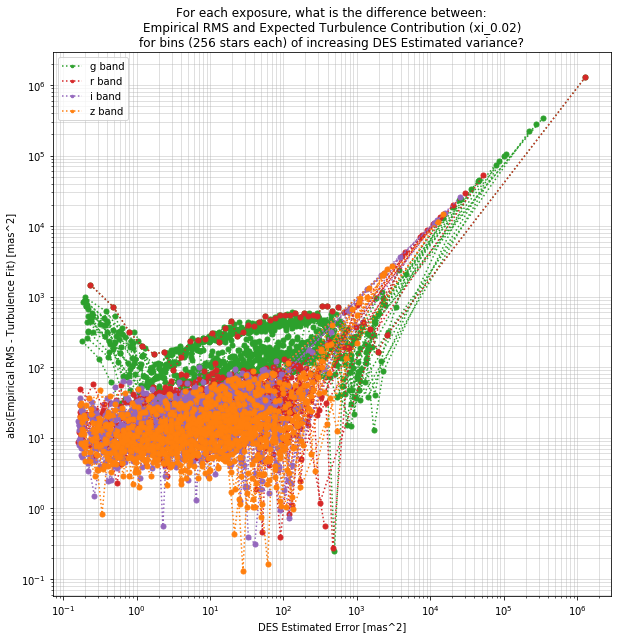

In [67]:
plt.figure(figsize=(10, 10))
title = "For each exposure, what is the difference between:"
title += "\nEmpirical RMS and Expected Turbulence Contribution (xi_0.02)"
title += "\nfor bins (256 stars each) of increasing DES Estimated variance?"
plt.title(title)

for band, c in bands.items():
    plt.loglog(exp[0], np.abs(exp[1]), c=c, ls=":", marker=".", markersize=10)
    for exp in d[band]:
        plt.loglog(exp[0], np.abs(exp[1]), c=c, ls=":", marker=".", markersize=10)
    plt.plot(0, 0, c=c, ls=":", marker=".", markersize=5, label=f"{band} band")

plt.xlabel("DES Estimated Error [mas^2]")
plt.ylabel("abs(Empirical RMS - Turbulence Fit) [mas^2]")

plt.legend(loc="upper left")
plt.grid(which="both", alpha=0.5)
plt.show()

Exposure: 348819
Band: z
Number of objects: 116592
INFO: Query finished. [astroquery.utils.tap.core]
There were 10207 matches within 0.5 arcsec.


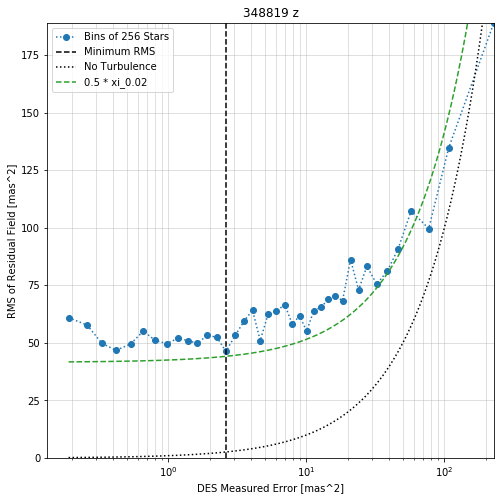

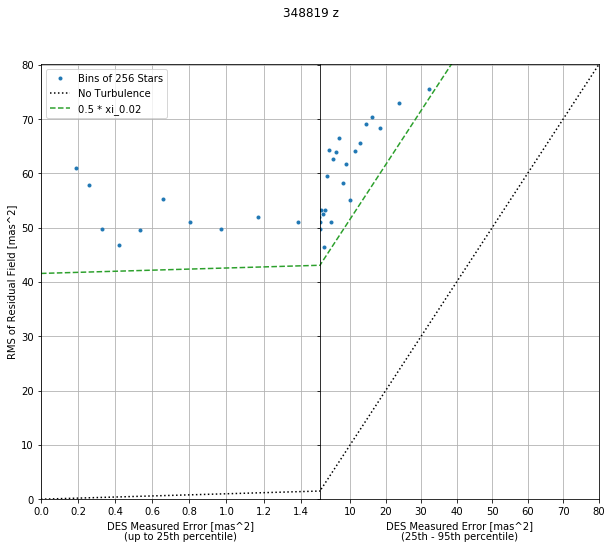

Exposure: 355303
Band: z
Number of objects: 107591
INFO: Query finished. [astroquery.utils.tap.core]
There were 11829 matches within 0.5 arcsec.


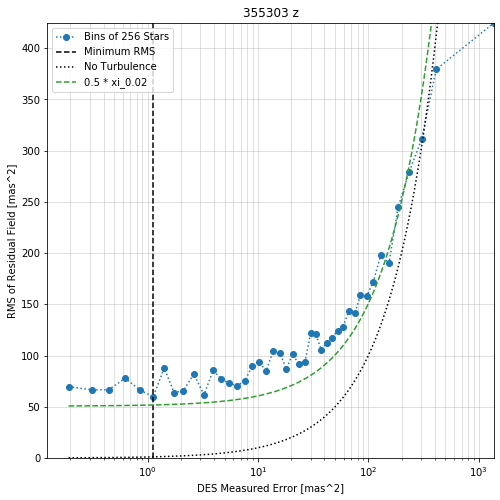

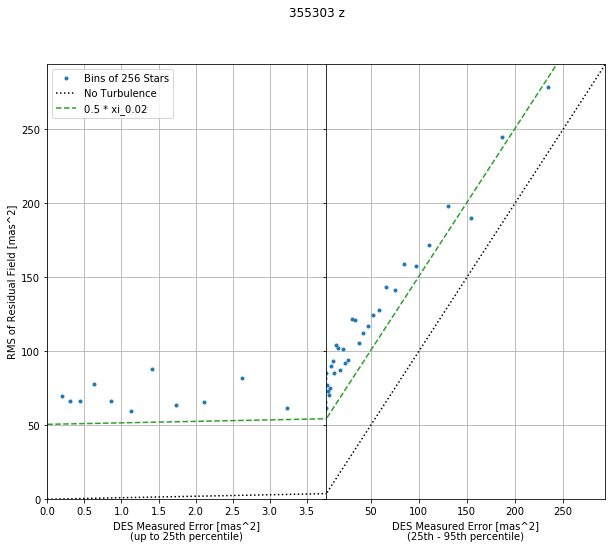

Exposure: 364209
Band: z
Number of objects: 114981
INFO: Query finished. [astroquery.utils.tap.core]
There were 11613 matches within 0.5 arcsec.


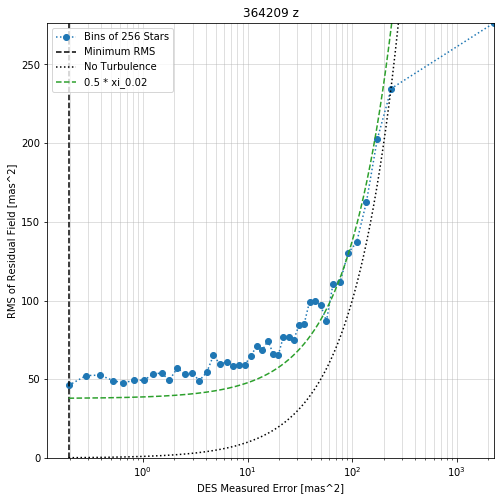

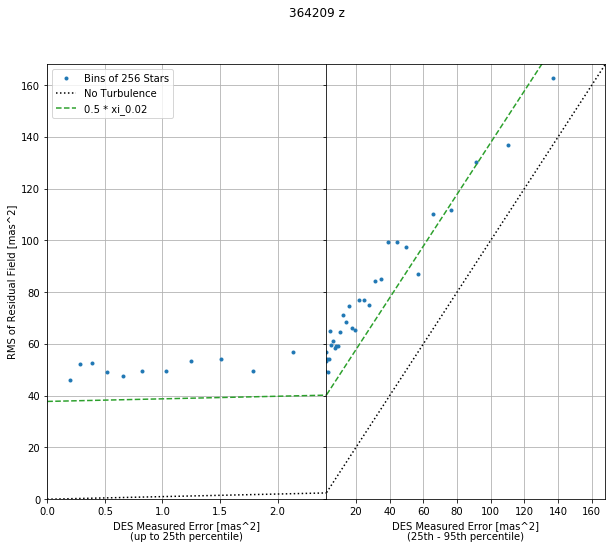

Exposure: 364215
Band: z
Number of objects: 110646
INFO: Query finished. [astroquery.utils.tap.core]
There were 10847 matches within 0.5 arcsec.


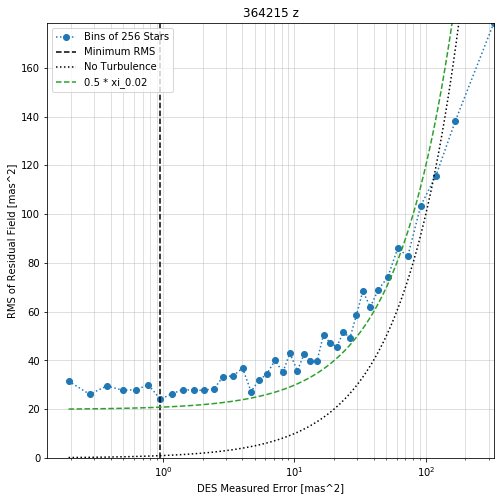

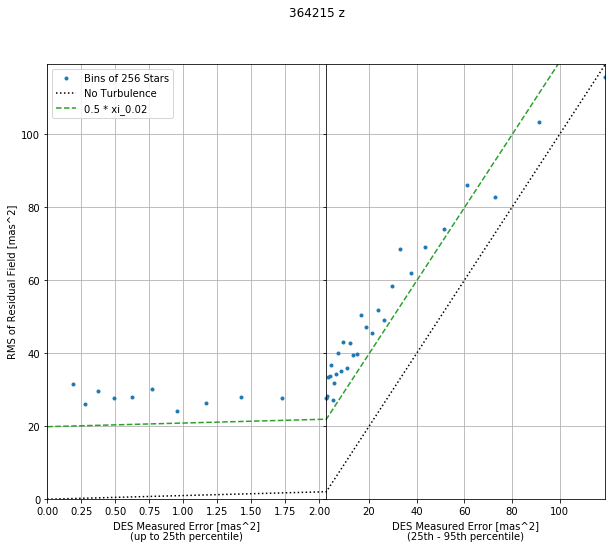

Exposure: 372006
Band: z
Number of objects: 145290
INFO: Query finished. [astroquery.utils.tap.core]
There were 10585 matches within 0.5 arcsec.


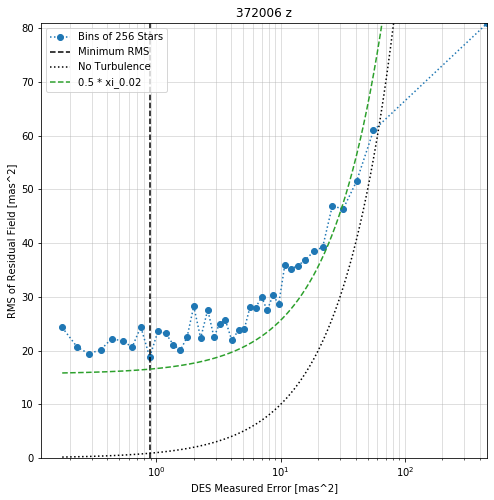

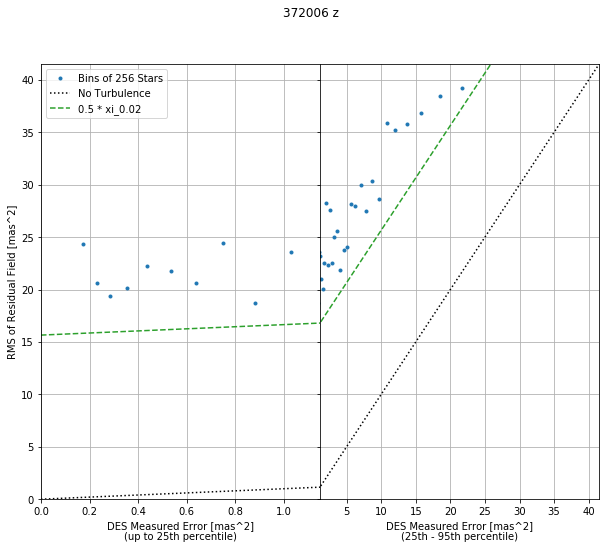

Exposure: 361580
Band: g
Number of objects: 113789
INFO: Query finished. [astroquery.utils.tap.core]
There were 12067 matches within 0.5 arcsec.


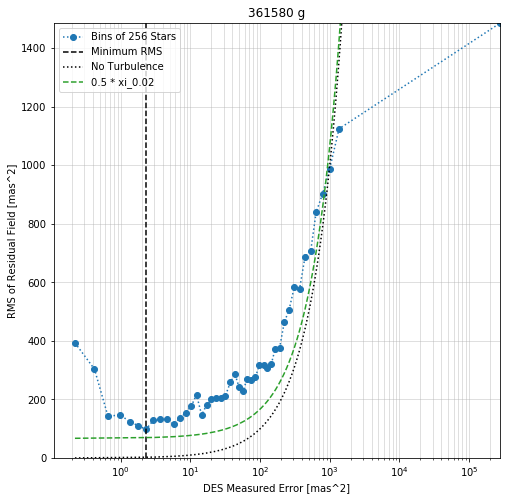

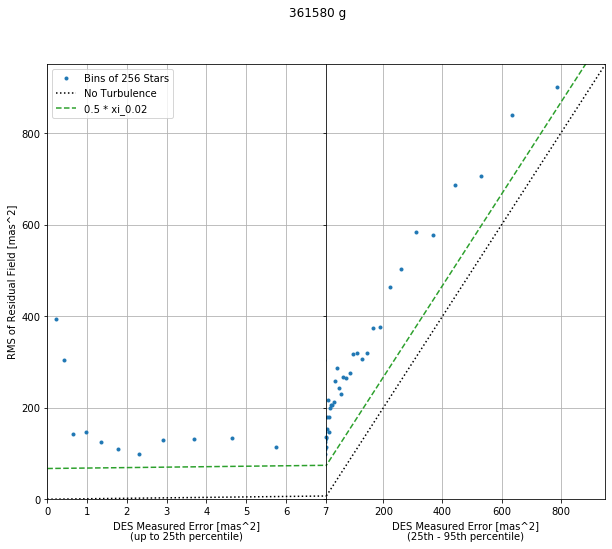

Exposure: 367484
Band: g
Number of objects: 90357
INFO: Query finished. [astroquery.utils.tap.core]
There were 11219 matches within 0.5 arcsec.


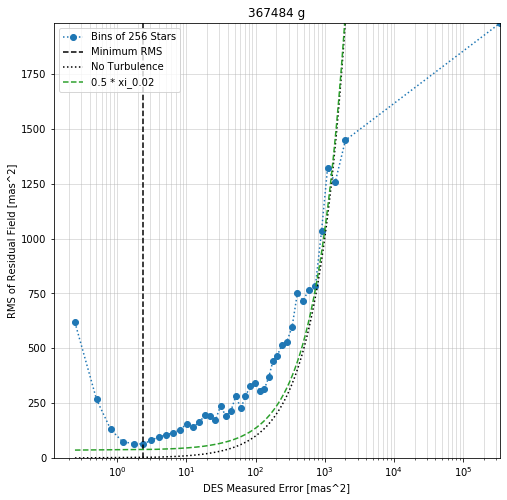

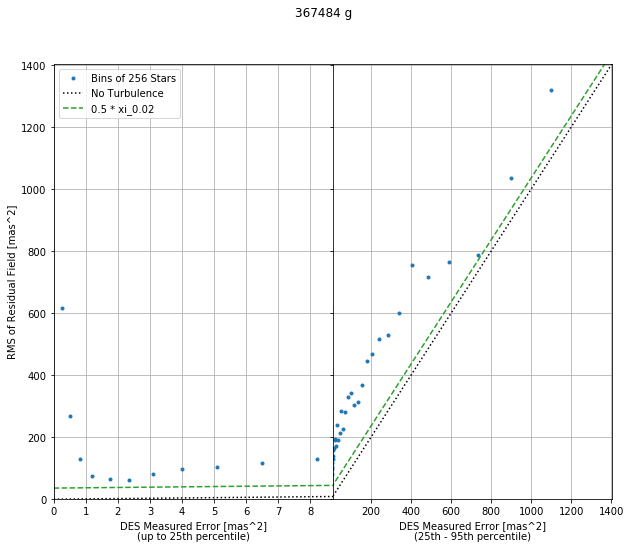

Exposure: 369801
Band: g
Number of objects: 98362
INFO: Query finished. [astroquery.utils.tap.core]
There were 12041 matches within 0.5 arcsec.


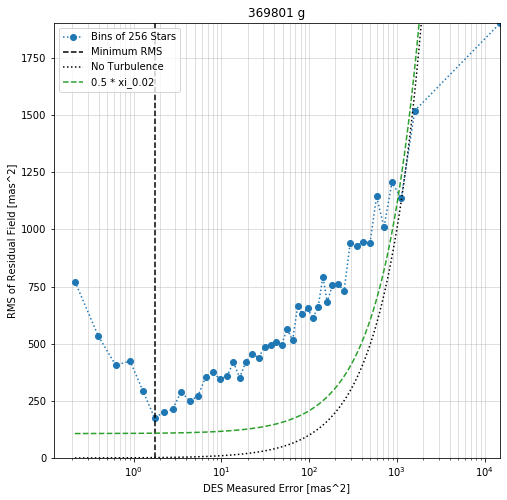

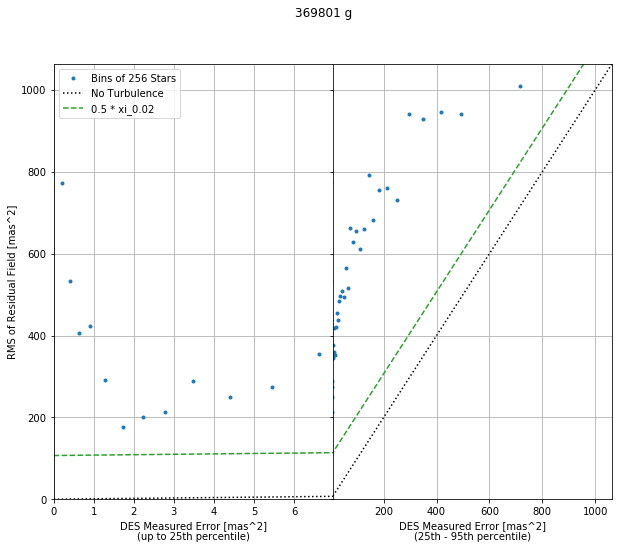

Exposure: 369803
Band: g
Number of objects: 100244
INFO: Query finished. [astroquery.utils.tap.core]
There were 11478 matches within 0.5 arcsec.


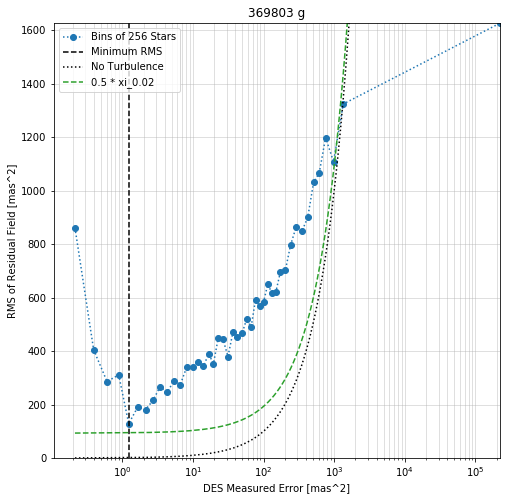

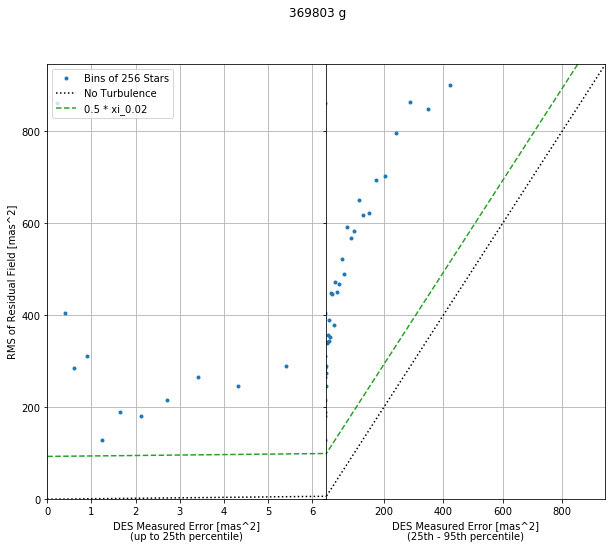

Exposure: 370204
Band: g
Number of objects: 102934
INFO: Query finished. [astroquery.utils.tap.core]
There were 11451 matches within 0.5 arcsec.


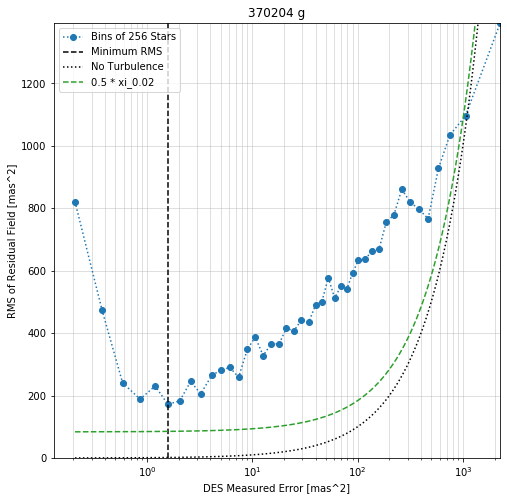

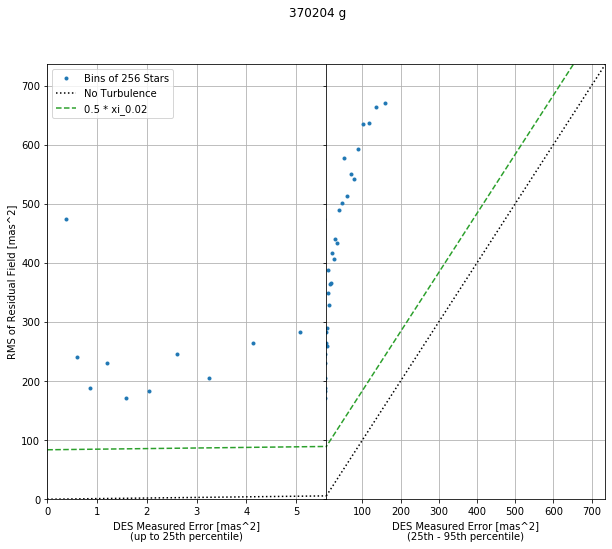

In [65]:
for expNum in zband[:5] + gband[:5]:
    dC = GPRutils.dataContainer()
    dC.load(expNum)

    x = dC.TV[dC.TV["Mask0"]]["X"].value
    y = dC.TV[dC.TV["Mask0"]]["Y"].value
    dx = dC.TV[dC.TV["Mask0"]]["dX"].value
    dy = dC.TV[dC.TV["Mask0"]]["dY"].value
    err = dC.TV[dC.TV["Mask0"]]["DES variance"].value

    # Find the observed turbulence
    xi = GPRutils.getXi(np.vstack([x, y]).T, np.vstack([dx, dy]).T)
    turbulence = xi[0]/2

    # Get an array of indices to index the entire table.
    table_inds = np.arange(len(dC.TV))

    # Sort the table by increasing DES variance.
    sort = np.argsort(err)

    # Get the indices from table_inds that only include the stars kept
    # by Mask0, and then sort them.
    sort_inds = table_inds[dC.TV["Mask0"]][sort]

    # Get the sorted residual field
    resid_x = dx[sort]
    resid_y = dy[sort]
    desvar = err[sort]

    # Split arrays into groups of nStars. This is an arbitrary choice.
    # 256 seems to work well for a catalog of stars with about 1 star
    # per arcmin^2 though.
    nStars = 256

    # Split the residual field arrays and the indices array into
    # sub-arrays of size approximately equal to nStars. See
    # documentation for np.array_split for exactly how the split is
    # made. Note that each sub-array will not be length (nStars,)
    # exactly.
    sort_inds = np.array_split(sort_inds, len(sort_inds)//nStars)
    resid_x = np.array_split(resid_x, len(dx)//nStars)
    resid_y = np.array_split(resid_y, len(dy)//nStars)
    desvar = np.array_split(desvar, len(desvar)//nStars)

    # Find RMS of each sub-array.
    RMSx = np.array([np.std(arr) for arr in resid_x])
    RMSy = np.array([np.std(arr) for arr in resid_y])
    desvar = np.array([np.mean(arr) for arr in desvar])

    # Get average RMS
    residuals_RMS = 0.5 * (RMSx**2 + RMSy**2)




    plt.figure(figsize=(8, 8))
    plt.title(f"{dC.expNum} {dC.band}")

    plt.semilogx(desvar, residuals_RMS, c="tab:blue", marker="o", ls=":", label=f"Bins of {nStars} Stars")

    minRMS_ind = np.argsort(residuals_RMS)[0]
    minRMS_measErr = desvar[minRMS_ind]
    plt.axvline(
        x=minRMS_measErr,
        c="k", ls="--",
        label="Minimum RMS")

    x = np.linspace(np.min(desvar), np.max(desvar), num=100000)
    plt.semilogx(x, x, c="k", ls=":", label="No Turbulence")

    p = np.poly1d([1, turbulence])
    plt.semilogx(x, p(x), c="tab:green", ls="--", label="0.5 * xi_0.02")

    plt.xlabel("DES Measured Error [mas^2]")
    plt.ylabel("RMS of Residual Field [mas^2]")

    plt.xlim((None, desvar.max()))
    plt.ylim((0, residuals_RMS.max()))

    plt.legend(loc="upper left")
    plt.grid(which="both", alpha=0.5)
    plt.show()




    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(10, 8))
    fig.suptitle(f"{dC.expNum} {dC.band}")
    fig.subplots_adjust(wspace=0)

    axes[0].plot(desvar, residuals_RMS, c="tab:blue", marker=".", ls="", label=f"Bins of {nStars} Stars")
    axes[1].plot(desvar, residuals_RMS, c="tab:blue", marker=".", ls="", label=f"Bins of {nStars} Stars")

    x = np.linspace(0, np.max(desvar))
    axes[0].plot(x, x, c="k", ls=":", label="No Turbulence")
    axes[1].plot(x, x, c="k", ls=":", label="No Turbulence")

    p = np.poly1d([1, turbulence])
    axes[0].plot(x, p(x), c="tab:green", ls="--", label="0.5 * xi_0.02")
    axes[1].plot(x, p(x), c="tab:green", ls="--", label="0.5 * xi_0.02")

    p1, p2 = 25, 95
    axes[0].set_xlabel(f"DES Measured Error [mas^2]\n(up to {p1}th percentile)")
    axes[1].set_xlabel(f"DES Measured Error [mas^2]\n({p1}th - {p2}th percentile)")

    axes[0].set_ylabel("RMS of Residual Field [mas^2]")

    axes[0].set_xlim((0, np.percentile(desvar, p1)))
    axes[1].set_xlim((np.percentile(desvar, (p1, p2))))

    axes[0].set_ylim((0, np.percentile(desvar, p2)))

    axes[0].grid()
    axes[1].grid()

    axes[0].legend(loc="upper left")

    plt.show()